In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from statistics import mean
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Hyderabad_House_Data.csv')

In [3]:
df.head()

,Unnamed: 0,Bedrooms,Bathrooms,Furnishing,Tennants,Area,Price,Locality
0,0,3 BHK Builder Floor,2,Furnished,Bachelors/Family,1800 sqft,"34,000","Bhagyalaxmi Nagar, Kavadiguda"
1,1,3 BHK Apartment,2,Semi-Furnished,Family,2500 sqft,"45,000","Gachibowli, Outer Ring Road"
2,2,1 BHK Builder Floor,Immediately,Furnished,Bachelors/Family,read more,"18,000",Gachibowli
3,3,3 BHK Apartment,Immediately,Furnished,Bachelors/Family,2160 sqft,"40,000","Moosapet, NH"
4,4,3 BHK Apartment,2,Semi-Furnished,Family,1580 sqft,"23,000",Raghavendra Colony kondapur


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1171 non-null   int64 
 1   Bedrooms    1171 non-null   object
 2   Bathrooms   1150 non-null   object
 3   Furnishing  1171 non-null   object
 4   Tennants    1170 non-null   object
 5   Area        1149 non-null   object
 6   Price       1171 non-null   object
 7   Locality    1171 non-null   object
dtypes: int64(1), object(7)
memory usage: 73.3+ KB


In [5]:
df.shape

(1171, 8)

In [6]:
df.describe()

,Unnamed: 0
count,1171.000000
mean,585.000000
std,338.182889
min,0.000000
25%,292.500000
50%,585.000000
75%,877.500000
max,1170.000000


# Data Exploration

In [7]:
#checking bedroom values
df['Bedrooms'].value_counts()

3 BHK Apartment                                                                                                                                                             479
2 BHK Apartment                                                                                                                                                             337
2 BHK Builder Floor                                                                                                                                                          78
3 BHK Builder Floor                                                                                                                                                          51
\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t2 BHK Apartment\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t            \t              40
\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t3 BHK Apartment\t\t\t\t\t\t\t\t\t\t\t\t\

In [8]:
df['Bathrooms'].value_counts()

2                                                                                                                                                                   391
1                                                                                                                                                                   381
Immediately                                                                                                                                                         106
3                                                                                                                                                                   101
East                                                                                                                                                                 56
\t\t\t\t\t\t\tImmediately\t\t\t                                                                                                                                 

In [9]:
df['Furnishing'].value_counts()

Semi-Furnished      622
Unfurnished         334
Furnished           186
Bachelors/Family     24
Family                4
Immediately           1
Name: Furnishing, dtype: int64

In [10]:
df['Tennants'].value_counts()

Bachelors/Family    694
Bachelors           274
Family              174
2                    17
3                     9
1                     2
Name: Tennants, dtype: int64

In [11]:
df['Area'].value_counts()

read more    76
1200 sqft    67
1000 sqft    55
1800 sqft    43
1100 sqft    38
             ..
1504 sqft     1
1840 sqft     1
1461 sqft     1
2050 sqft     1
990 sqft      1
Name: Area, Length: 285, dtype: int64

In [12]:
df['Area'].unique

<bound method Series.unique of 0                  1800 sqft
1                  2500 sqft
2                  read more
3                  2160 sqft
4                  1580 sqft
                ...         
1166                900 sqft
1167    East Facing Property
1168               1515 sqft
1169               1500 sqft
1170               1100 sqft
Name: Area, Length: 1171, dtype: object>

# Data cleansing

In [13]:
def House_data_preprocessing(no_houses,mean_area,df):
    for house in range(no_houses): 
        
        # Preprocessing Price Data Values
        df.Price[house] = re.sub(r'\t','', df.Price[house])
        df.Price[house] = re.sub(r'\s','',df.Price[house])



        # Preprocessing Bathroom data Values
        if type(df.Bathrooms[house]) == float :
            df.Bathrooms[house] = '2'
            df.Bathrooms[house] = re.sub(r'\t','', df.Bathrooms[house])
            df.Bathrooms[house] = re.sub(r'\s+','',df.Bathrooms[house])  
        if df.Bathrooms[house][0] not in ['1','2','3','4','5']:
            df.Bathrooms[house] = '2'
        else : 
            df.Bathrooms[house] = df.Bathrooms[house][0]
            
        # Preprocessing Furnishing-type Values
        if df.Furnishing[house] in [ 'Bachelors/Family' , 'Family','Immediately' ] :
            df.Furnishing[house] = 'Semi-Furnished'
                # Preprocessing Tennants-Type Values
        if df.Tennants[house] not in ['Bachelors/Family', 'Family', 'Bachelors' ] :
            df.Tennants[house] = 'Bachelors/Family'
            
        # Preprocessing Area Values
        if 'sqft' not in df.Area[house]:
            df.Area[house] = '1477 sqft'
            
        # Preprocessing the Localtiy Values
        df.Locality[house] = re.sub(r'\t','',df.Locality[house])
        df.Locality[house] = re.sub(r'\s+','',df.Locality[house])  
        
    
    return df

In [14]:
def Mean_area_houses(no_houses):
    area = []
    for house in range(no_houses) :
        if type(df.Area[house]) == float :
            df.Area[house] = 'readmore'
        if 'sqft' in df.Area[house]:
            area_ = re.findall(r'\d+', df.Area[house])
            area.append(int(area_[0]))
    mean_area = mean(area)
    return(mean_area)

In [15]:
no_houses = len(df)
mean_area = Mean_area_houses(no_houses)

In [16]:
Housedata = House_data_preprocessing(no_houses, mean_area, df)

In [17]:
Housedata.head()

,Unnamed: 0,Bedrooms,Bathrooms,Furnishing,Tennants,Area,Price,Locality
0,0,3 BHK Builder Floor,2,Furnished,Bachelors/Family,1800 sqft,"34,000","BhagyalaxmiNagar,Kavadiguda"
1,1,3 BHK Apartment,2,Semi-Furnished,Family,2500 sqft,"45,000","Gachibowli,OuterRingRoad"
2,2,1 BHK Builder Floor,2,Furnished,Bachelors/Family,1477 sqft,"18,000",Gachibowli
3,3,3 BHK Apartment,2,Furnished,Bachelors/Family,2160 sqft,"40,000","Moosapet,NH"
4,4,3 BHK Apartment,2,Semi-Furnished,Family,1580 sqft,"23,000",RaghavendraColonykondapur


In [18]:
#Now checking only bedroom data
Housedata['Bedrooms'].unique()

array(['3 BHK Builder Floor', '3 BHK Apartment', '1 BHK Builder Floor',
       '3 BHK Service Apartment', 'Studio Apartment', '2 BHK Apartment',
       '2 BHK Builder Floor', '2 BHK Service Apartment',
       '1 BHK Apartment', '4 BHK Apartment', '2 BHK Penthouse',
       '4 BHK Builder Floor', '5 BHK Apartment', '1 BHK Penthouse',
       '4 BHK Penthouse', 'Apartment',
       '\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t2 BHK Apartment\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t            \t',
       '\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t3 BHK Builder Floor\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t            \t',
       '\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t3 BHK Apartment\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t            \t',
       '\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\tStudio Ap

In [19]:
#removing tabs and whitespaces
Housedata['Bedrooms']=Housedata['Bedrooms'].str.strip()

In [20]:
Housedata['Bedrooms'].unique()

array(['3 BHK Builder Floor', '3 BHK Apartment', '1 BHK Builder Floor',
       '3 BHK Service Apartment', 'Studio Apartment', '2 BHK Apartment',
       '2 BHK Builder Floor', '2 BHK Service Apartment',
       '1 BHK Apartment', '4 BHK Apartment', '2 BHK Penthouse',
       '4 BHK Builder Floor', '5 BHK Apartment', '1 BHK Penthouse',
       '4 BHK Penthouse', 'Apartment', '10 BHK Service Apartment'],
      dtype=object)

In [21]:
 #As we can see there are some irrelevant data like studio apartment etc
def bedroom_process(no_houses,Housedata):
    for house in range(no_houses):
        if Housedata.Bedrooms[house][0] not in ['1','2','3','4','5']:
            Housedata.Bedrooms[house] = '3 BHK Apartment'
    return Housedata

In [22]:
no_houses = len(df)
housedata=bedroom_process(no_houses,Housedata)


In [23]:
housedata.head()

,Unnamed: 0,Bedrooms,Bathrooms,Furnishing,Tennants,Area,Price,Locality
0,0,3 BHK Builder Floor,2,Furnished,Bachelors/Family,1800 sqft,"34,000","BhagyalaxmiNagar,Kavadiguda"
1,1,3 BHK Apartment,2,Semi-Furnished,Family,2500 sqft,"45,000","Gachibowli,OuterRingRoad"
2,2,1 BHK Builder Floor,2,Furnished,Bachelors/Family,1477 sqft,"18,000",Gachibowli
3,3,3 BHK Apartment,2,Furnished,Bachelors/Family,2160 sqft,"40,000","Moosapet,NH"
4,4,3 BHK Apartment,2,Semi-Furnished,Family,1580 sqft,"23,000",RaghavendraColonykondapur


In [24]:
housedata['Bedrooms'].unique()

array(['3 BHK Builder Floor', '3 BHK Apartment', '1 BHK Builder Floor',
       '3 BHK Service Apartment', '2 BHK Apartment',
       '2 BHK Builder Floor', '2 BHK Service Apartment',
       '1 BHK Apartment', '4 BHK Apartment', '2 BHK Penthouse',
       '4 BHK Builder Floor', '5 BHK Apartment', '1 BHK Penthouse',
       '4 BHK Penthouse', '10 BHK Service Apartment'], dtype=object)

In [25]:
#creating a new column 'bhk'
housedata['bhk']=housedata['Bedrooms'].apply(lambda x: int(x.split(' ')[0]))

In [26]:
housedata.head()

,Unnamed: 0,Bedrooms,Bathrooms,Furnishing,Tennants,Area,Price,Locality,bhk
0,0,3 BHK Builder Floor,2,Furnished,Bachelors/Family,1800 sqft,"34,000","BhagyalaxmiNagar,Kavadiguda",3
1,1,3 BHK Apartment,2,Semi-Furnished,Family,2500 sqft,"45,000","Gachibowli,OuterRingRoad",3
2,2,1 BHK Builder Floor,2,Furnished,Bachelors/Family,1477 sqft,"18,000",Gachibowli,1
3,3,3 BHK Apartment,2,Furnished,Bachelors/Family,2160 sqft,"40,000","Moosapet,NH",3
4,4,3 BHK Apartment,2,Semi-Furnished,Family,1580 sqft,"23,000",RaghavendraColonykondapur,3


In [27]:
Houserent=housedata.drop('Unnamed: 0',axis=1)

In [28]:
Houserent['bhk'].unique()

array([ 3,  1,  2,  4,  5, 10], dtype=int64)

In [29]:
#Lets check locality
len(Houserent['Locality'])

1171

In [30]:
len(Houserent['Locality'].unique())

568

In [31]:
#checking the data count of each locality data
locality_stats=Houserent.groupby('Locality')['Locality'].agg('count').sort_values(ascending=False)
locality_stats

Locality
Kondapur                                         27
Attapur                                          24
Nizampet                                         18
BanjaraHills,NH                                  18
Gachibowli,OuterRingRoad                         18
                                                 ..
NewDilshukhNagar,NH                               1
NewMaruthiNagar                                   1
NirmalaRatnaApartment,Gangaram,Chandanagar,NH     1
NizampetRoad                                      1
MallaReddyColony,Secunderabad                     1
Name: Locality, Length: 568, dtype: int64

In [32]:
len(locality_stats[locality_stats<=5])

532

In [33]:
locality_stats_less_than_5=locality_stats[locality_stats<=5]
locality_stats_less_than_5

Locality
MantriCelestia,Gachibowli,OuterRingRoad          5
DrA.S.RaoNagar                                   5
Punjagutta,NH                                    5
Aminpur                                          5
Tellapur,OuterRingRoad                           5
                                                ..
NewDilshukhNagar,NH                              1
NewMaruthiNagar                                  1
NirmalaRatnaApartment,Gangaram,Chandanagar,NH    1
NizampetRoad                                     1
MallaReddyColony,Secunderabad                    1
Name: Locality, Length: 532, dtype: int64

In [34]:
Houserent.Locality.unique()

array(['BhagyalaxmiNagar,Kavadiguda', 'Gachibowli,OuterRingRoad',
       'Gachibowli', 'Moosapet,NH', 'RaghavendraColonykondapur',
       'BanjaraDarwaja,GolcondaFort', 'MohansSaiSignature,Nanakramguda',
       'Gowlidoddy', 'Somajiguda,NH', 'Kapra',
       'TilakNagar,NewNallakunta,NH', 'Neknampur,Manikonda,OuterRingRoad',
       'MayuriNagar,Miyapur', 'AccurateWindChimes,Narsingi,OuterRingRoad',
       'HyderNagar,NH',
       'VajrasJasmineCounty,Financialdistrictgucchibowli',
       'TirumalaGardens,BanjaraHills,NH',
       'ParagonVenkatadriApartments,Kachiguda,NH',
       'MeenakshiHomes,Miyapur,NH', 'Papulguda',
       'Bachupally,OuterRingRoad', 'NanakramGuda',
       'L&TSereneCounty,Gachibowli,OuterRingRoad', 'SMPlaza,ECIL',
       'ChattaBazaar,PatharGatti',
       'LodhaMeridian,KukatpallyHousingBoardColony,NH', 'HitechCity',
       'BanjaraHills,NH', 'Mehindipatnam', 'YMCACircle,Narayanguda',
       'VajrasJasmineCounty,Gachibowli,OuterRingRoad', 'JubileeHills',
       'Kon

In [35]:
Houserent.Locality=Houserent.Locality.apply(lambda x: 'other' if x in locality_stats_less_than_5 else x )
len(Houserent['Locality'].unique())
Houserent['Locality'].unique()

array(['other', 'Gachibowli,OuterRingRoad', 'Bachupally,OuterRingRoad',
       'HitechCity', 'BanjaraHills,NH', 'Kondapur',
       'Nallagandla,Serilingampally', 'Upparpally,HyderabadExpressway',
       'Madhapur', 'Chandanagar,NH', 'BandlagudaJagir', 'Kukatpally,NH',
       'AdityaImperialHeights,Hafeezpet,NH', 'Gajularamaram',
       'Kokapet,OuterRingRoad', 'Attapur', 'Puppalaguda', 'Mehdipatnam',
       'Nizampet', 'MyHomeAvatar,Narsingi,OuterRingRoad', 'MasabTank',
       'SuchitraCircle', 'Ameerpet,NH', 'Shaikpet',
       'KukatpallyHousingBoardColony,NH', 'Hafeezpet,NH',
       'Narsingi,OuterRingRoad', 'SunCity,Bandlaguda,ChevellaRoad',
       'Manikonda,OuterRingRoad', 'ToliChowki', 'Miyapur,NH',
       'LBNagar,NH', '', 'Uppal,NH', 'Madinaguda,Hafeezpet,NH',
       'Begumpet', 'Hyderabad'], dtype=object)

# Data Visualisation

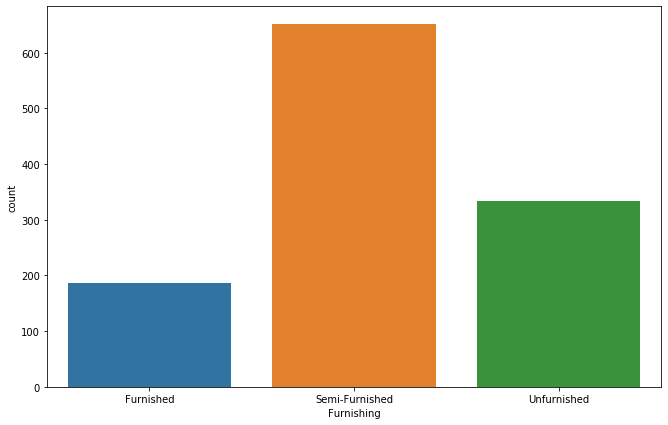

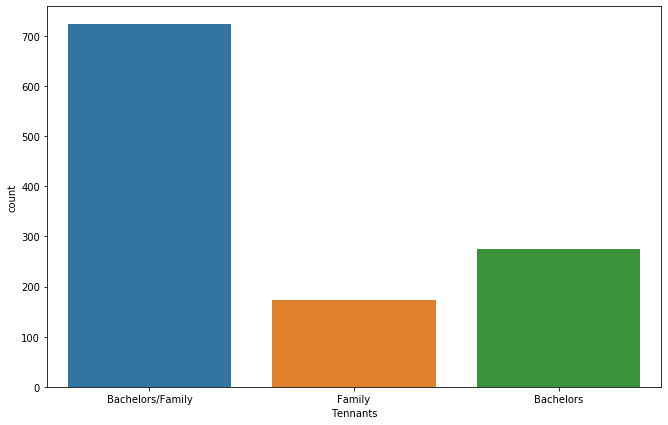

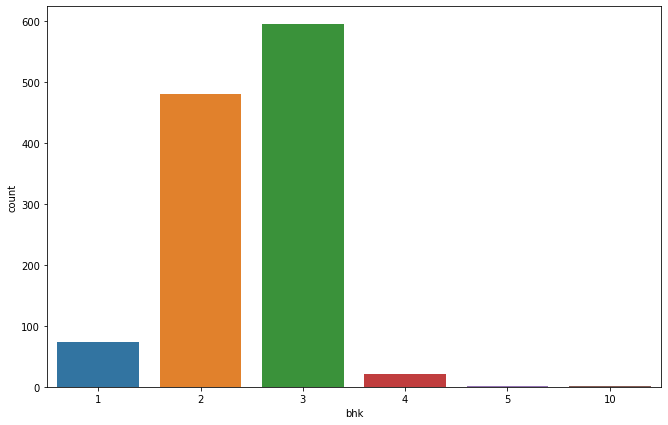

In [36]:

for col in ['Furnishing','Tennants','bhk']:
    plt.figure(figsize=(11,7))
    sns.countplot(data =Houserent,x = col)
    plt.show()

# Model Building

In [37]:
Houserent.head()

,Bedrooms,Bathrooms,Furnishing,Tennants,Area,Price,Locality,bhk
0,3 BHK Builder Floor,2,Furnished,Bachelors/Family,1800 sqft,"34,000",other,3
1,3 BHK Apartment,2,Semi-Furnished,Family,2500 sqft,"45,000","Gachibowli,OuterRingRoad",3
2,1 BHK Builder Floor,2,Furnished,Bachelors/Family,1477 sqft,"18,000",other,1
3,3 BHK Apartment,2,Furnished,Bachelors/Family,2160 sqft,"40,000",other,3
4,3 BHK Apartment,2,Semi-Furnished,Family,1580 sqft,"23,000",other,3


In [38]:
#Getting dummy variables for locality
dummies=pd.get_dummies(Houserent.Locality)
dummies.head()

,,"AdityaImperialHeights,Hafeezpet,NH","Ameerpet,NH",Attapur,"Bachupally,OuterRingRoad",BandlagudaJagir,"BanjaraHills,NH",Begumpet,"Chandanagar,NH","Gachibowli,OuterRingRoad",...,"Narsingi,OuterRingRoad",Nizampet,Puppalaguda,Shaikpet,SuchitraCircle,"SunCity,Bandlaguda,ChevellaRoad",ToliChowki,"Uppal,NH","Upparpally,HyderabadExpressway",other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [39]:
hrent=pd.concat([Houserent,dummies.drop('other',axis='columns')],axis='columns')
hrent.head()

,Bedrooms,Bathrooms,Furnishing,Tennants,Area,Price,Locality,bhk,,"AdityaImperialHeights,Hafeezpet,NH",...,"Nallagandla,Serilingampally","Narsingi,OuterRingRoad",Nizampet,Puppalaguda,Shaikpet,SuchitraCircle,"SunCity,Bandlaguda,ChevellaRoad",ToliChowki,"Uppal,NH","Upparpally,HyderabadExpressway"
0,3 BHK Builder Floor,2,Furnished,Bachelors/Family,1800 sqft,"34,000",other,3,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3 BHK Apartment,2,Semi-Furnished,Family,2500 sqft,"45,000","Gachibowli,OuterRingRoad",3,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1 BHK Builder Floor,2,Furnished,Bachelors/Family,1477 sqft,"18,000",other,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3 BHK Apartment,2,Furnished,Bachelors/Family,2160 sqft,"40,000",other,3,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3 BHK Apartment,2,Semi-Furnished,Family,1580 sqft,"23,000",other,3,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
hrenters=hrent.drop('Locality',axis='columns')

In [41]:
hrenters.head()

,Bedrooms,Bathrooms,Furnishing,Tennants,Area,Price,bhk,,"AdityaImperialHeights,Hafeezpet,NH","Ameerpet,NH",...,"Nallagandla,Serilingampally","Narsingi,OuterRingRoad",Nizampet,Puppalaguda,Shaikpet,SuchitraCircle,"SunCity,Bandlaguda,ChevellaRoad",ToliChowki,"Uppal,NH","Upparpally,HyderabadExpressway"
0,3 BHK Builder Floor,2,Furnished,Bachelors/Family,1800 sqft,"34,000",3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3 BHK Apartment,2,Semi-Furnished,Family,2500 sqft,"45,000",3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1 BHK Builder Floor,2,Furnished,Bachelors/Family,1477 sqft,"18,000",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3 BHK Apartment,2,Furnished,Bachelors/Family,2160 sqft,"40,000",3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3 BHK Apartment,2,Semi-Furnished,Family,1580 sqft,"23,000",3,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
hrenters=hrenters.drop('Bedrooms',axis='columns')

In [43]:
hrenters.head()

,Bathrooms,Furnishing,Tennants,Area,Price,bhk,,"AdityaImperialHeights,Hafeezpet,NH","Ameerpet,NH",Attapur,...,"Nallagandla,Serilingampally","Narsingi,OuterRingRoad",Nizampet,Puppalaguda,Shaikpet,SuchitraCircle,"SunCity,Bandlaguda,ChevellaRoad",ToliChowki,"Uppal,NH","Upparpally,HyderabadExpressway"
0,2,Furnished,Bachelors/Family,1800 sqft,"34,000",3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Semi-Furnished,Family,2500 sqft,"45,000",3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,Furnished,Bachelors/Family,1477 sqft,"18,000",1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,Furnished,Bachelors/Family,2160 sqft,"40,000",3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,Semi-Furnished,Family,1580 sqft,"23,000",3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
#Getting dummy variables for Furnishing
dummies=pd.get_dummies(hrenters.Furnishing)
dummies.head()

,Furnished,Semi-Furnished,Unfurnished
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,0,1,0


In [45]:
df5=pd.concat([hrenters,dummies.drop('Unfurnished',axis='columns')],axis='columns')
df5.head()

,Bathrooms,Furnishing,Tennants,Area,Price,bhk,,"AdityaImperialHeights,Hafeezpet,NH","Ameerpet,NH",Attapur,...,Nizampet,Puppalaguda,Shaikpet,SuchitraCircle,"SunCity,Bandlaguda,ChevellaRoad",ToliChowki,"Uppal,NH","Upparpally,HyderabadExpressway",Furnished,Semi-Furnished
0,2,Furnished,Bachelors/Family,1800 sqft,"34,000",3,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,Semi-Furnished,Family,2500 sqft,"45,000",3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,Furnished,Bachelors/Family,1477 sqft,"18,000",1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2,Furnished,Bachelors/Family,2160 sqft,"40,000",3,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2,Semi-Furnished,Family,1580 sqft,"23,000",3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [46]:
df6=df5.drop('Furnishing',axis='columns')

In [47]:
df6.head()

,Bathrooms,Tennants,Area,Price,bhk,,"AdityaImperialHeights,Hafeezpet,NH","Ameerpet,NH",Attapur,"Bachupally,OuterRingRoad",...,Nizampet,Puppalaguda,Shaikpet,SuchitraCircle,"SunCity,Bandlaguda,ChevellaRoad",ToliChowki,"Uppal,NH","Upparpally,HyderabadExpressway",Furnished,Semi-Furnished
0,2,Bachelors/Family,1800 sqft,"34,000",3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,Family,2500 sqft,"45,000",3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,Bachelors/Family,1477 sqft,"18,000",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2,Bachelors/Family,2160 sqft,"40,000",3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2,Family,1580 sqft,"23,000",3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [48]:
#Creating dummy variables for Tennants
dummies=pd.get_dummies(df6.Tennants)
dummies.head()

,Bachelors,Bachelors/Family,Family
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1


In [49]:
df7=pd.concat([df6,dummies.drop('Bachelors',axis='columns')],axis='columns')
df7.head()

,Bathrooms,Tennants,Area,Price,bhk,,"AdityaImperialHeights,Hafeezpet,NH","Ameerpet,NH",Attapur,"Bachupally,OuterRingRoad",...,Shaikpet,SuchitraCircle,"SunCity,Bandlaguda,ChevellaRoad",ToliChowki,"Uppal,NH","Upparpally,HyderabadExpressway",Furnished,Semi-Furnished,Bachelors/Family,Family
0,2,Bachelors/Family,1800 sqft,"34,000",3,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,2,Family,2500 sqft,"45,000",3,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,2,Bachelors/Family,1477 sqft,"18,000",1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,2,Bachelors/Family,2160 sqft,"40,000",3,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,2,Family,1580 sqft,"23,000",3,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [50]:
#removing tenants column
df8=df7.drop('Tennants',axis='columns')

In [51]:
df8.head()

,Bathrooms,Area,Price,bhk,,"AdityaImperialHeights,Hafeezpet,NH","Ameerpet,NH",Attapur,"Bachupally,OuterRingRoad",BandlagudaJagir,...,Shaikpet,SuchitraCircle,"SunCity,Bandlaguda,ChevellaRoad",ToliChowki,"Uppal,NH","Upparpally,HyderabadExpressway",Furnished,Semi-Furnished,Bachelors/Family,Family
0,2,1800 sqft,"34,000",3,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,2,2500 sqft,"45,000",3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,2,1477 sqft,"18,000",1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,2,2160 sqft,"40,000",3,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,2,1580 sqft,"23,000",3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [52]:
df8['Area']=df8['Area'].str.rstrip('sqft')

In [53]:
df8.head()

,Bathrooms,Area,Price,bhk,,"AdityaImperialHeights,Hafeezpet,NH","Ameerpet,NH",Attapur,"Bachupally,OuterRingRoad",BandlagudaJagir,...,Shaikpet,SuchitraCircle,"SunCity,Bandlaguda,ChevellaRoad",ToliChowki,"Uppal,NH","Upparpally,HyderabadExpressway",Furnished,Semi-Furnished,Bachelors/Family,Family
0,2,1800,"34,000",3,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,2,2500,"45,000",3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,2,1477,"18,000",1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,2,2160,"40,000",3,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,2,1580,"23,000",3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [54]:
df8['Price']=df8['Price'].str.replace(',','').astype(float)

In [55]:
df8.head()

,Bathrooms,Area,Price,bhk,,"AdityaImperialHeights,Hafeezpet,NH","Ameerpet,NH",Attapur,"Bachupally,OuterRingRoad",BandlagudaJagir,...,Shaikpet,SuchitraCircle,"SunCity,Bandlaguda,ChevellaRoad",ToliChowki,"Uppal,NH","Upparpally,HyderabadExpressway",Furnished,Semi-Furnished,Bachelors/Family,Family
0,2,1800,34000.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,2,2500,45000.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,2,1477,18000.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,2,2160,40000.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,2,1580,23000.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [56]:
df8['Area']=df8['Area'].str.replace(',','').astype(float)

In [57]:
df8['Bathrooms']=df8['Bathrooms'].astype(int)

In [58]:
df8.head()

,Bathrooms,Area,Price,bhk,,"AdityaImperialHeights,Hafeezpet,NH","Ameerpet,NH",Attapur,"Bachupally,OuterRingRoad",BandlagudaJagir,...,Shaikpet,SuchitraCircle,"SunCity,Bandlaguda,ChevellaRoad",ToliChowki,"Uppal,NH","Upparpally,HyderabadExpressway",Furnished,Semi-Furnished,Bachelors/Family,Family
0,2,1800.0,34000.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,2,2500.0,45000.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,2,1477.0,18000.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,2,2160.0,40000.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,2,1580.0,23000.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [59]:
df8.shape

(1171, 44)

In [60]:
df8.head(3)

,Bathrooms,Area,Price,bhk,,"AdityaImperialHeights,Hafeezpet,NH","Ameerpet,NH",Attapur,"Bachupally,OuterRingRoad",BandlagudaJagir,...,Shaikpet,SuchitraCircle,"SunCity,Bandlaguda,ChevellaRoad",ToliChowki,"Uppal,NH","Upparpally,HyderabadExpressway",Furnished,Semi-Furnished,Bachelors/Family,Family
0,2,1800.0,34000.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,2,2500.0,45000.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,2,1477.0,18000.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [61]:
X=df8.drop('Price',axis='columns')

In [62]:
y=df8.Price

In [63]:
X.shape

(1171, 43)

In [64]:
y.shape

(1171,)

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [66]:
X_train.shape

(936, 43)

In [67]:
y_train.shape

(936,)

In [68]:
X_test.shape

(235, 43)

In [69]:
y_test.shape

(235,)

In [71]:
import xgboost
from xgboost import XGBRegressor

my_model = XGBRegressor()
my_model = XGBRegressor(n_estimators=150,learning_rate=0.07)
my_model.fit(X_train,y_train, early_stopping_rounds=5, 
             eval_set=[(X_test,y_test)], verbose=False)
my_model.score(X_test,y_test)

0.608533066395468

In [122]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score,confusion_matrix
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
regressor.score(X_train,y_train)

0.9383434435299401

In [74]:
X.columns

Index(['Bathrooms', 'Area', 'bhk', '', 'AdityaImperialHeights,Hafeezpet,NH',
       'Ameerpet,NH', 'Attapur', 'Bachupally,OuterRingRoad', 'BandlagudaJagir',
       'BanjaraHills,NH', 'Begumpet', 'Chandanagar,NH',
       'Gachibowli,OuterRingRoad', 'Gajularamaram', 'Hafeezpet,NH',
       'HitechCity', 'Hyderabad', 'Kokapet,OuterRingRoad', 'Kondapur',
       'Kukatpally,NH', 'KukatpallyHousingBoardColony,NH', 'LBNagar,NH',
       'Madhapur', 'Madinaguda,Hafeezpet,NH', 'Manikonda,OuterRingRoad',
       'MasabTank', 'Mehdipatnam', 'Miyapur,NH',
       'MyHomeAvatar,Narsingi,OuterRingRoad', 'Nallagandla,Serilingampally',
       'Narsingi,OuterRingRoad', 'Nizampet', 'Puppalaguda', 'Shaikpet',
       'SuchitraCircle', 'SunCity,Bandlaguda,ChevellaRoad', 'ToliChowki',
       'Uppal,NH', 'Upparpally,HyderabadExpressway', 'Furnished',
       'Semi-Furnished', 'Bachelors/Family', 'Family'],
      dtype='object')

In [115]:
def predict_price(Locality,Furnishing,Tennants,Bathrooms,Area,bhk):    
    loc_index = np.where(X.columns==Locality)[0][0]
    fur_index = np.where(X.columns==Furnishing)[0][0]
    ten_index = np.where(X.columns==Tennants)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = Bathrooms
    x[1] = Area
    x[2] = bhk
    if loc_index >= 0 & fur_index >= 0 & ten_index >= 0:
        x[loc_index] = 1
        x[fur_index] = 2
        x[ten_index] = 3
        

    return regressor.predict([x])[0]

In [121]:
predict_price('Kondapur','Semi-Furnished','Family',3, 1200, 2)

24500.0

In [129]:
predict_price('Kondapur','Furnished','Family',3, 1200, 3)

35000.0

In [132]:
#Exporting the model to pickle file
import pickle
with open('Hyderabad_house_rent.pickle','wb') as f:
    pickle.dump(regressor,f)

In [133]:
#Export location and column information to a file that will be useful later on in our prediction application

In [134]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))